## Jensen-Shannon Divergence plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict
from emd_func import compute_pymed_emd
from plot_func import plot_emd, plot_sorted
from coverage_func import plot_scatter, subplot_scatter
from outliers_func import remove_outliers
from trunc_mean_func import truncated_mean
from boxplot_func import create_sns_table_from_big_dict, create_sns_table_from_flat_dict, plot_box_plot
from ggplot import *

from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>");

In [2]:
#Reading the dictionary data file
curr_dir = !pwd
domain_name = "zf-C2H2"
my_path = curr_dir[0]+"/../7.filters/filtered_dicts/"+domain_name+"/"
with open(my_path+'zf-C2H2_hmm_states_dict_10.13_cov-filter.pik', 'rb') as handle:
    states_dict = pickle.load(handle)

#Getting the number of states for this domain
states_num = len(states_dict.keys())

In [3]:
### Creating flat dictionaries
#Create a dictionary for JSD values only
states_JSD_dict = defaultdict(list)
for state in states_dict.keys():
    for d in states_dict[state]:
        states_JSD_dict[state].append(d["JSD"])

In [3]:
#Create a dictionary for JSD adj values only
states_JSD_adj_dict = defaultdict(list)
for state in states_dict.keys():
    for d in states_dict[state]:
        states_JSD_adj_dict[state].append(d["JSD_adj"])

In [4]:
#Create a dictionary for Coverage values only
states_mean_cov_dict = defaultdict(list)
for state in states_dict.keys():
    for d in states_dict[state]:
        states_mean_cov_dict[state].append(d["coverage_mean"])

In [4]:
#Scaling the JSD
states_JSD_adj_dict_scaled = defaultdict(list)
for state in states_dict.keys():
    state_len = len(states_dict[state])
    for d in states_dict[state]:
        states_JSD_adj_dict_scaled[state].append(float(d["JSD_adj"]/state_len))

In [ ]:
#Create a dictionary for JSD adj values only
states_JSD_adj_dict = defaultdict(list)
for state in states_dict.keys():
    for d in states_dict[state]:
        states_JSD_adj_dict[state].append(d["JSD_adj"])

In [5]:
#Create a dictionary for JSD adj, chrom, chrom_pos
states_JSD_adj_chrom_pos_dict = defaultdict(list)
for state in states_dict.keys():
    for d in states_dict[state]:
        states_JSD_adj_chrom_pos_dict[state].append((d["JSD_adj"], d["chrom"], d["chrom_pos"][0]))

In [10]:
jsd_adj_chrom_pos_df = pd.DataFrame([
    [col1,col2, col3, col4] for col1, d in states_JSD_adj_chrom_pos_dict.items() for (col2, col3, col4) in d
])
jsd_adj_chrom_pos_df.columns = ["state", "JSD", "chrom", "chrom_pos"]
jsd_adj_chrom_pos_df.to_csv(curr_dir[0]+"/data-frames/"+domain_name+"_JSD_adj_chrom_pos_df.csv", sep='\t')

In [5]:
#Exporting to data-frames tables
#JSD Adj
jsd_adj_df = pd.DataFrame([
    [col1,col2] for col1, d in states_JSD_adj_dict.items() for col2 in d
])
jsd_adj_df.columns = ["state", "JSD"]
jsd_adj_df.to_csv(curr_dir[0]+"/data-frames/"+domain_name+"_JSD_adj_df.csv", sep='\t')

### JSD EMD plots

EMD between JSD and all 0s distribution. EMD for each HMM state individually.

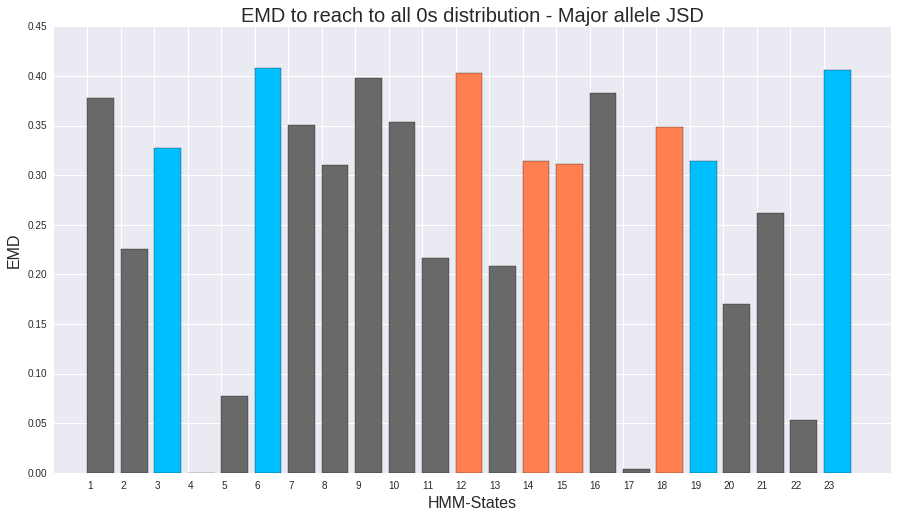

In [7]:
JSD_emd_dict = compute_pymed_emd(states_JSD_dict, 1000)
plot_emd(JSD_emd_dict, "Major allele JSD", curr_dir, "SNP_Zinc_filter_JSD_Major_allele_EMD", True, False)

In [49]:
emd_jsd_df = pd.DataFrame.from_dict(JSD_emd_dict, orient='index')
emd_jsd_df.columns = ["EMD"]
emd_jsd_df["state"] = JSD_emd_dict.keys()

In [105]:
scale_color_gradient?

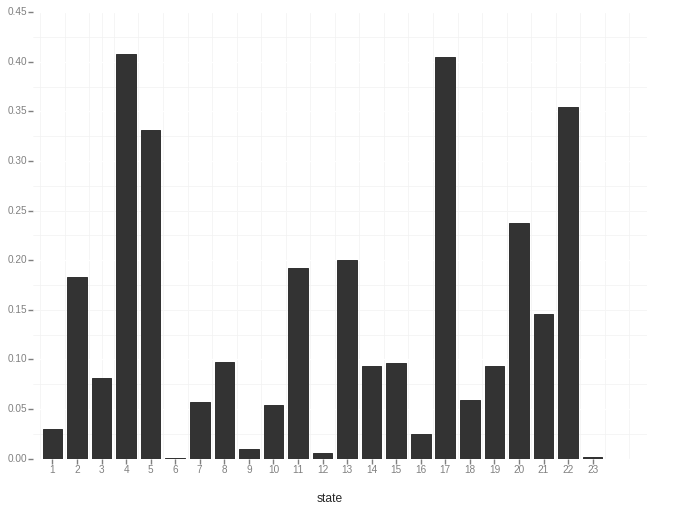

<ggplot: (8732696093853)>

In [106]:
ggplot(aes(x='state', weight='EMD'), data=emd_jsd_df) + geom_bar() + scale_color_gradient(low='red', mid='white', high='blue', limits=[4000,6000]) + theme_bw()

In [58]:
jsd_adj_df = pd.DataFrame.from_dict(states_JSD_adj_dict, orient='index')
jsd_adj_df["state"] = states_JSD_adj_dict.keys()

In [88]:
jsd_adj_df = pd.DataFrame([
    [col1,col2] for col1, d in states_JSD_adj_dict.items() for col2 in d
])
jsd_adj_df.columns = ["state", "JSD"]

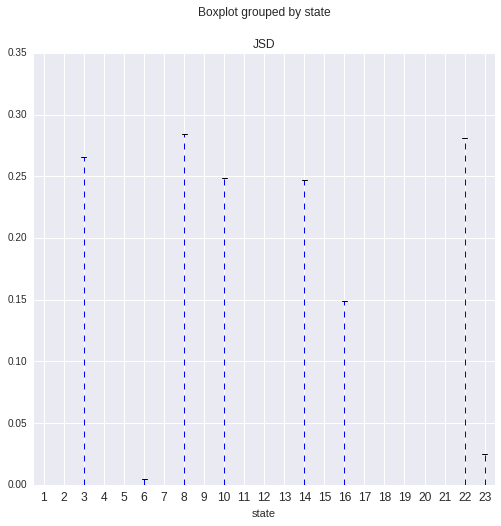

In [94]:
jsd_adj_df.boxplot(column="JSD",        # Column to plot
                 by= "state",         # Column to split upon
                 figsize= (8,8))        # Figure size

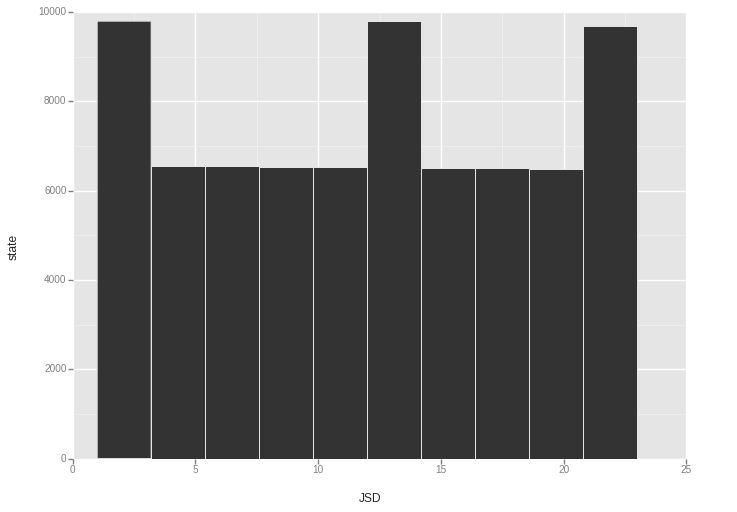

<ggplot: (8732697788653)>

In [85]:
ggplot(jsd_adj_df, aes(x='JSD', y='state')) + geom_histogram()

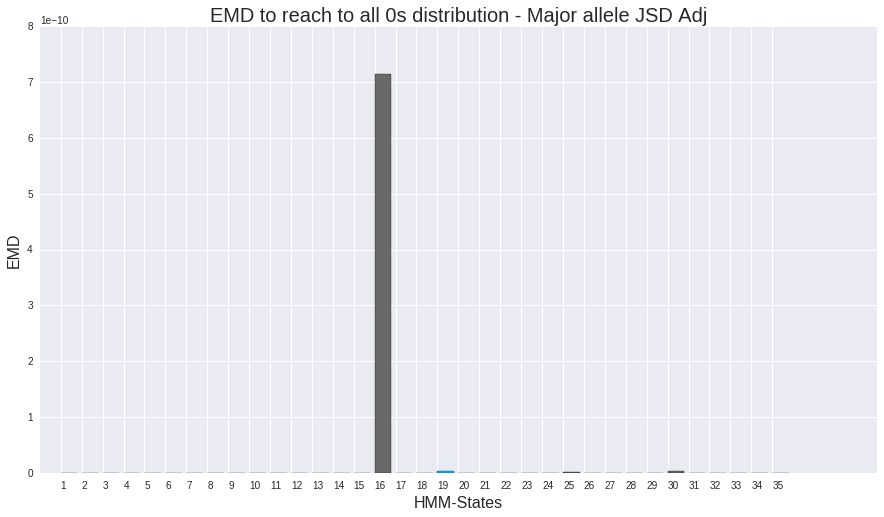

In [6]:
JSD_adj_emd_dict = compute_pymed_emd(states_JSD_adj_dict_scaled, 1000)
plot_emd(JSD_adj_emd_dict, "Major allele JSD Adj", curr_dir, "SNP_Zinc_filter_JSD_Major_allele_EMD", False, False)

### States sorted by different parameters

In [9]:
#Adj JSD Sort the states by EMD
plot_sorted(JSD_adj_emd_dict, "Sorted by EMD", "Adj JSD", curr_dir, "Sorted_EMD_JSD_Adj_filter", True, False)

IndexError: index 44 is out of bounds for axis 1 with size 23

In [7]:
#Exporting to data-frames tables
#JSD Adj
emd_jsd_adj_df = pd.DataFrame([
    [col1,col2] for col1, col2 in JSD_adj_emd_dict.items()
])
emd_jsd_adj_df.columns = ["state", "EMD"]
emd_jsd_adj_df.to_csv(curr_dir[0]+"/data-frames/"+domain_name+"_EMD_JSD_adj_df.csv", sep='\t')                                                                                                                                             

In [11]:
#Count the number of non-zero Adj MAF
non_zero_adj_JSD = [0] * states_num
for state in states_dict.keys():
    for d in states_dict[state]:
        if (d["JSD_adj"] != 0):
            non_zero_adj_JSD[state-1] += 1

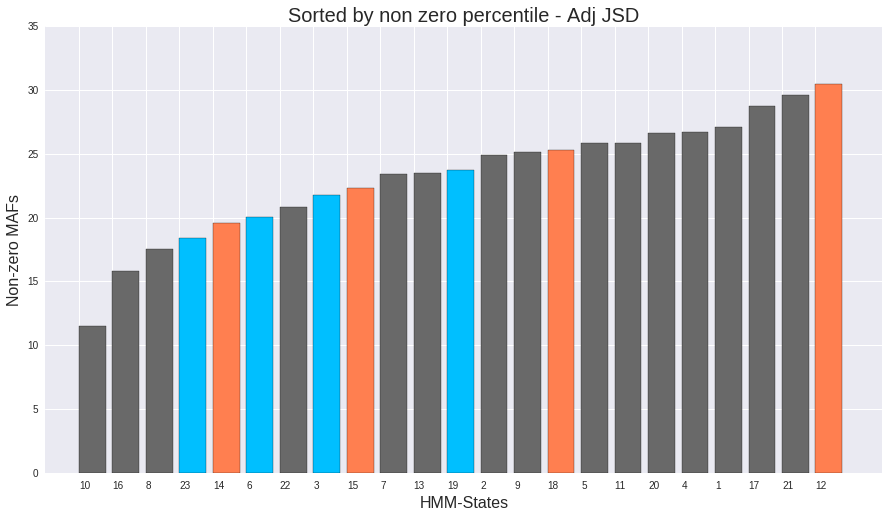

In [12]:
non_zero_percentile = {}
for state in states_dict.keys():
    frac = non_zero_adj_JSD[state-1]/float(len(states_dict[state]))
    perc = frac * 100
    non_zero_percentile[state] = perc
plot_sorted(non_zero_percentile, "Sorted by non zero percentile", "Adj JSD", curr_dir, "Non_zero_percent", False, False)

### Coverage scatter plots

JSD plots for each state, and coverage. Checking if outliers are a result of bad coverage.

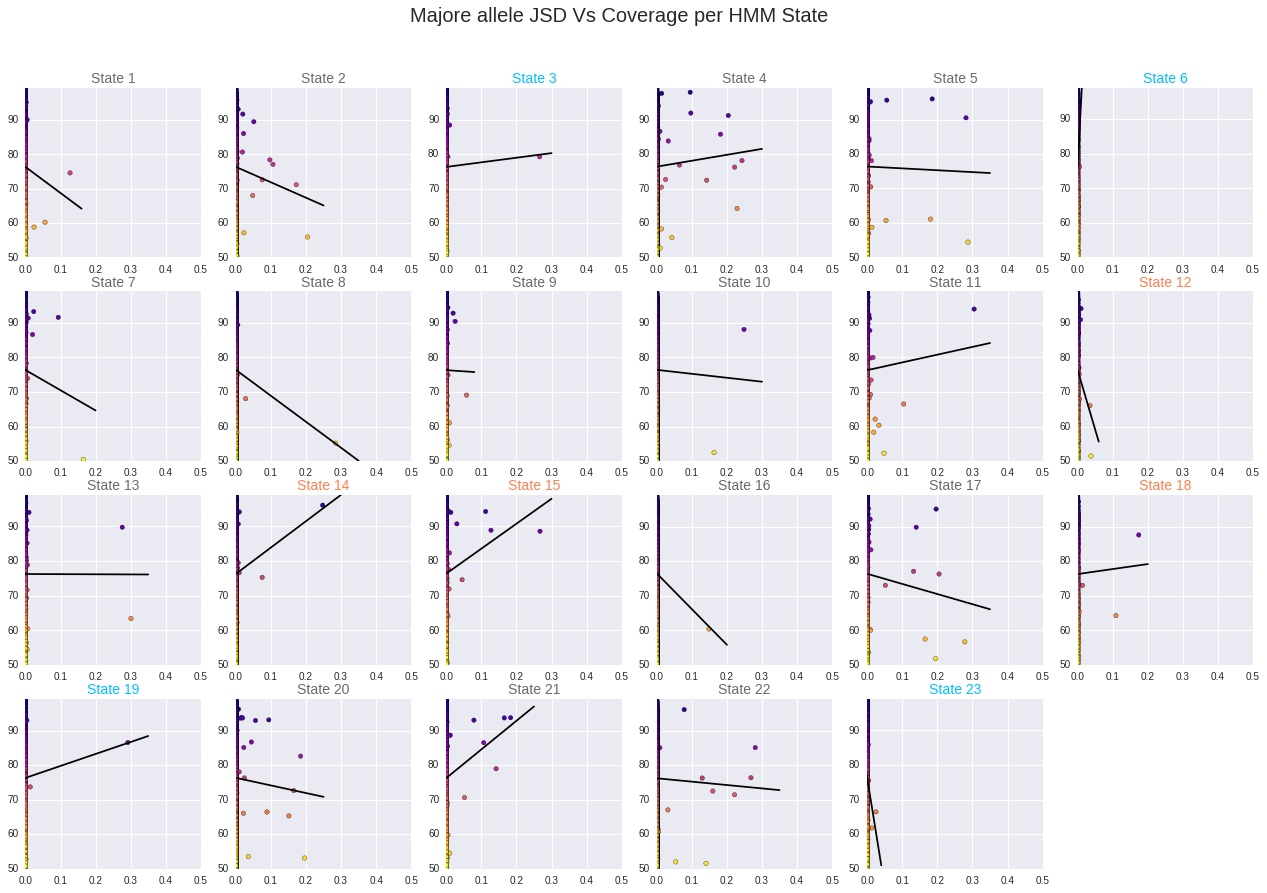

In [5]:
#Create a JSD Coverage scatter subplot for each state
plt.figure(figsize=(22,14))

colors = ['dimgrey', 'dimgrey', 'deepskyblue', 'dimgrey', 'dimgrey', 'deepskyblue', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'coral', 
              'dimgrey', 'coral', 'coral', 'dimgrey', 'dimgrey', 'coral', 'deepskyblue', 'dimgrey', 'dimgrey', 'dimgrey', 'deepskyblue']

for state in states_JSD_adj_dict.keys():
    state_JSD = states_JSD_adj_dict[state]
    state_cov_mean = states_mean_cov_dict[state]
    subplot_num = int("46"+str(state))
    plt.subplot(4, 6, state)
    subplot_scatter(state_JSD, state_cov_mean, "State "+str(state), colors[state-1])

#plt.text(0.5, 0.5, 'common X', ha='center', fontsize=10)
#plt.text(0.04, 0.5, 'common Y', va='center', rotation='vertical', fontsize=10)
plt.suptitle("Majore allele JSD Vs Coverage per HMM State", fontsize=20)
plt.savefig(curr_dir[0]+"/plots/JSD_cov_per_state.pdf", bbox_inches="tight")
plt.show()

In [17]:
for i in range(len(states_dict[3])):
    if (states_dict[3][i]["JSD_adj"] > 0.2):
        print states_dict[3][i]

{'JSD': 0.26672245427310876, 'filter': ['PASS'], 'coverage_mean': 79.25, 'af': 0.44200000000000006, 'af_adj': 0.44099999999999995, 'aa_ref': 'G', 'prot_pos': 209, 'ens_gene': 'ENSG00000196793', 'an_adj': [105510], 'alterations_af_adj_dict': defaultdict(<type 'list'>, {'C': [0.44099999999999995]}), 'chrom_pos': (44052903, 44052902, 44052901), 'chrom': '10', 'JSD_adj': 0.26598236512009277, 'bp_ref': 'TGT'}


In [19]:
for i in range(len(states_dict[19])):
    if (states_dict[19][i]["JSD_adj"] > 0.2):
        print states_dict[19][i]

{'JSD': 0.29085470312584394, 'filter': ['PASS'], 'coverage_mean': 86.53, 'af': 0.474, 'af_adj': 0.4754, 'aa_ref': 'H', 'prot_pos': 233, 'ens_gene': 'ENSG00000176222', 'an_adj': [105558], 'alterations_af_adj_dict': defaultdict(<type 'list'>, {'Y': [0.4754]}), 'chrom_pos': (44377669, 44377668, 44377667), 'chrom': '19', 'JSD_adj': 0.29193096579132993, 'bp_ref': 'CAT'}


### Removing outliers

Removing from each state the data points that are 2 std from the mean. Then calculating EMD again.

In [6]:
no_outliers_JSD_adj_dict = remove_outliers(states_JSD_adj_dict)
no_outliers_JSD_adj_emd_dict = compute_pymed_emd(no_outliers_JSD_adj_dict, 1000)

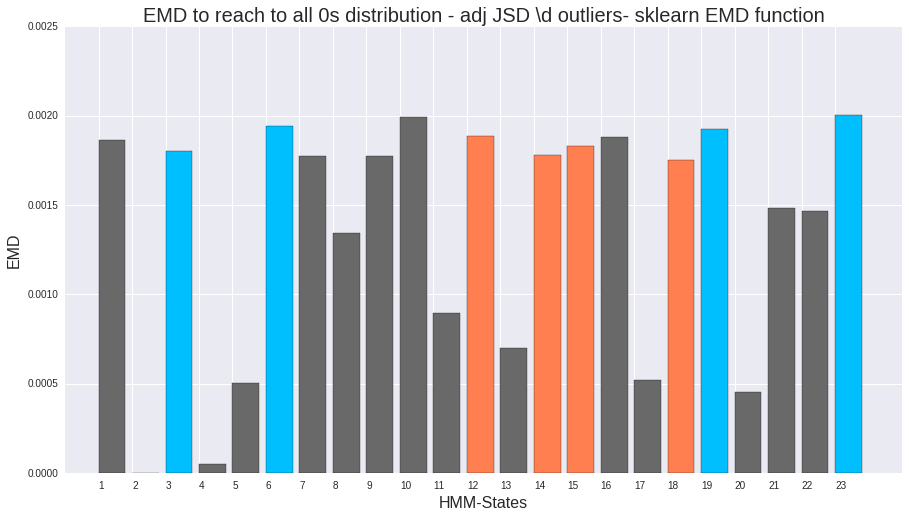

In [15]:
plot_emd(no_outliers_JSD_adj_emd_dict, "adj JSD \d outliers- sklearn EMD function", curr_dir, "no_outliers_adj_JSD_EMD", True, False)

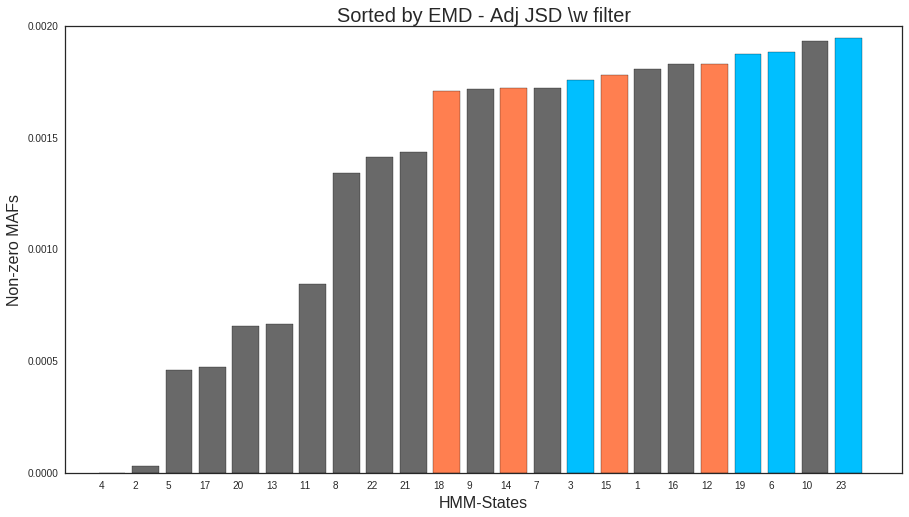

In [10]:
import seaborn as sns
sns.set_style("white")
#Adj JSD no outliers Sort the states by EMD
plot_sorted(no_outliers_JSD_adj_emd_dict, "Sorted by EMD", "Adj JSD \w filter", curr_dir, "Sorted_EMD_JSD_Adj_outliers_filter_rev", True, True)

### Trim 0s before calculating EMD

Find the lowest number of 0s in a distribution. Remove this number of 0s from all distriubtions. Then, calculate EMD and try to see boxplots and medians.
This isn't good for cases usch as state #12: high number of non-zero low values.

In [18]:
#Count the number of zero Adj MAF
zero_adj_jsd = [0] * states_num
for state in states_dict.keys():
    for d in states_dict[state]:
        if (d["JSD_adj"] == 0):
            zero_adj_jsd[state-1] += 1

In [19]:
min_0s = min(zero_adj_jsd)

In [20]:
#Trim each state by the same number of data points
states_dict_0s = states_dict.copy()
for state in states_dict_0s.keys():
    #Sort the state list
    state_sorted = sorted(states_dict_0s[state], key=lambda k: k['JSD_adj'])
    states_dict_0s[state] = state_sorted[min_0s:]

In [21]:
jsd_med = []
for state in states_dict_0s.keys():
    jsds = []
    for d in states_dict_0s[state]:     
        jsds.append(d["JSD_adj"])
    jsd_med.append(np.median(jsds))

In [22]:
#Create a dictionary for JSD adj values only
states_JSD_adj_dict_0s = defaultdict(list)
for state in states_dict_0s.keys():
    for d in states_dict_0s[state]:
        states_JSD_adj_dict_0s[state].append(d["JSD_adj"])

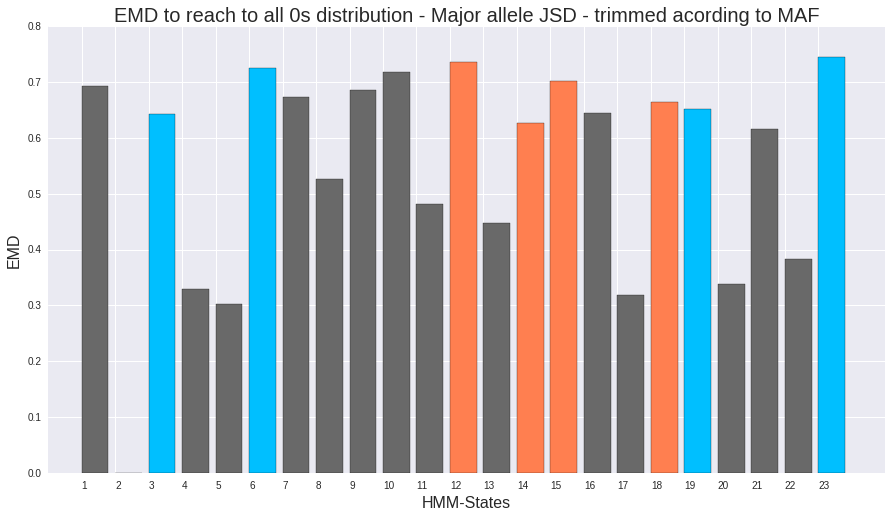

In [23]:
trim0s_jsd_emd_dict = compute_pymed_emd(states_JSD_adj_dict_0s, 1000)
plot_emd(trim0s_jsd_emd_dict, "Major allele JSD - trimmed acording to MAF", curr_dir, "SNP_Zinc_filter_JSD_Major_allele_EMD", True, False)

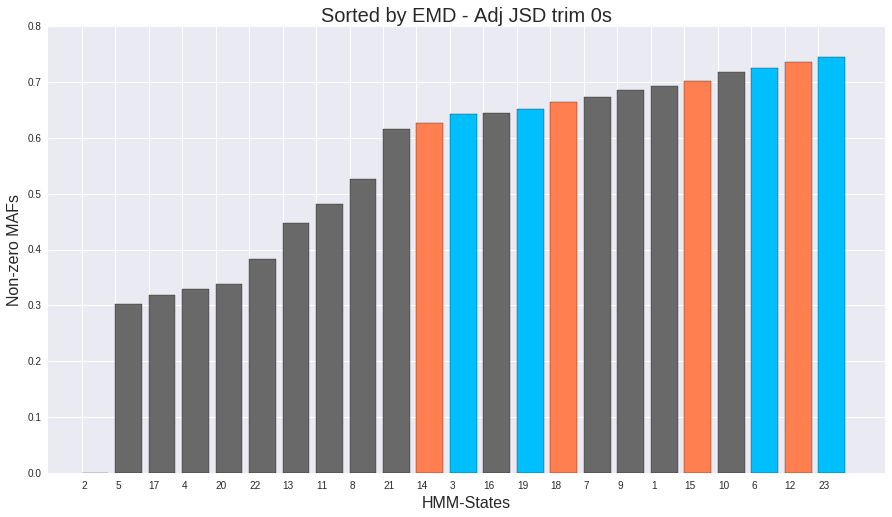

In [24]:
plot_sorted(trim0s_jsd_emd_dict, "Sorted by EMD", "Adj JSD trim 0s", curr_dir, "Sorted_EMD_JSD_Adj_filter", True, False)

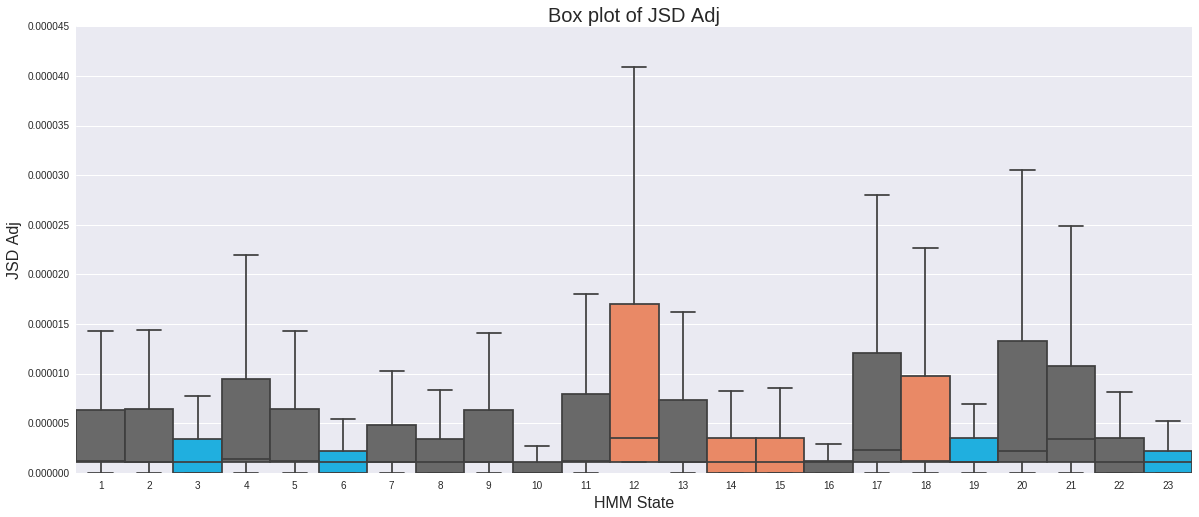

In [25]:
jsd_adj_sns_table = create_sns_table_from_flat_dict(states_JSD_adj_dict_0s, "JSD Adj")
plot_box_plot(jsd_adj_sns_table, states_JSD_adj_dict_0s.keys(), "JSD Adj", "Box plot of JSD Adj", "box_plot_JSD_Adj_trim_0s", False)

### Trim 90% of 0s before EMD

In [26]:
#Count the number of zero Adj JSD
zero_adj_JSD = [0] * states_num
for state in states_dict.keys():
    for d in states_dict[state]:
        if (d["JSD_adj"] == 0):
            zero_adj_JSD[state-1] += 1

In [27]:
#Trim each state by the same % of 0 data points
trim_per = 0.9

states_dict_0s_per = states_dict.copy()
for state in states_dict_0s.keys():
    #Sort the state list
    state_sorted = sorted(states_dict_0s_per[state], key=lambda k: k['JSD_adj'])
    trim_num = int(np.round(zero_adj_JSD[state-1] * trim_per))
    states_dict_0s_per[state] = state_sorted[trim_num:]

In [28]:
#Create a dictionary for JSD adj values only
states_JSD_adj_dict_0s_per = defaultdict(list)
for state in states_dict_0s_per.keys():
    for d in states_dict_0s_per[state]:
        states_JSD_adj_dict_0s_per[state].append(d["JSD_adj"])

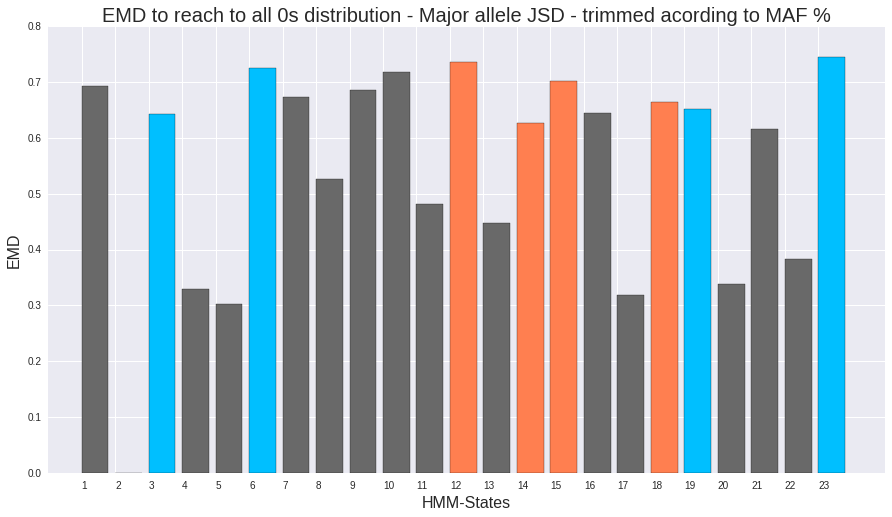

In [29]:
trim0s_per_jsd_emd_dict = compute_pymed_emd(states_JSD_adj_dict_0s_per, 1000)
plot_emd(trim0s_per_jsd_emd_dict, "Major allele JSD - trimmed acording to MAF %", curr_dir, "SNP_Zinc_filter_JSD_Major_allele_EMD", True, False)

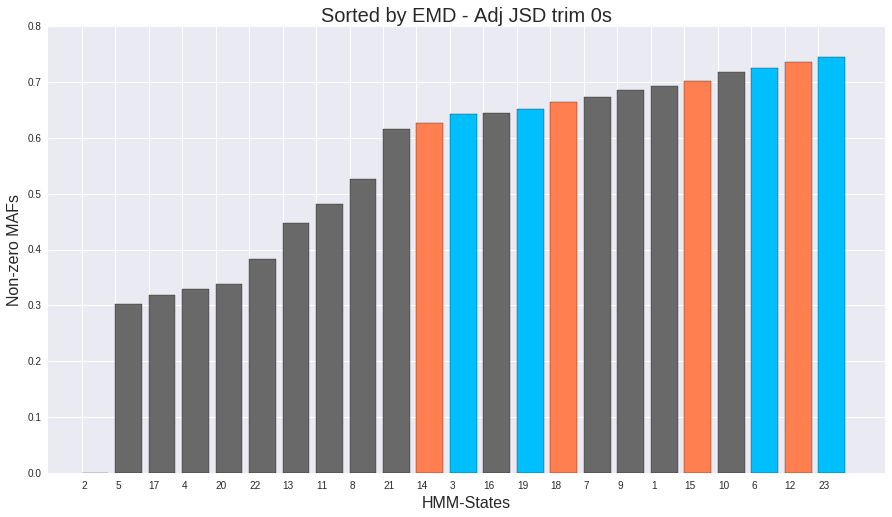

In [30]:
plot_sorted(trim0s_per_jsd_emd_dict, "Sorted by EMD", "Adj JSD trim 0s", curr_dir, "Sorted_EMD_MAF_Adj_filter", True, False)

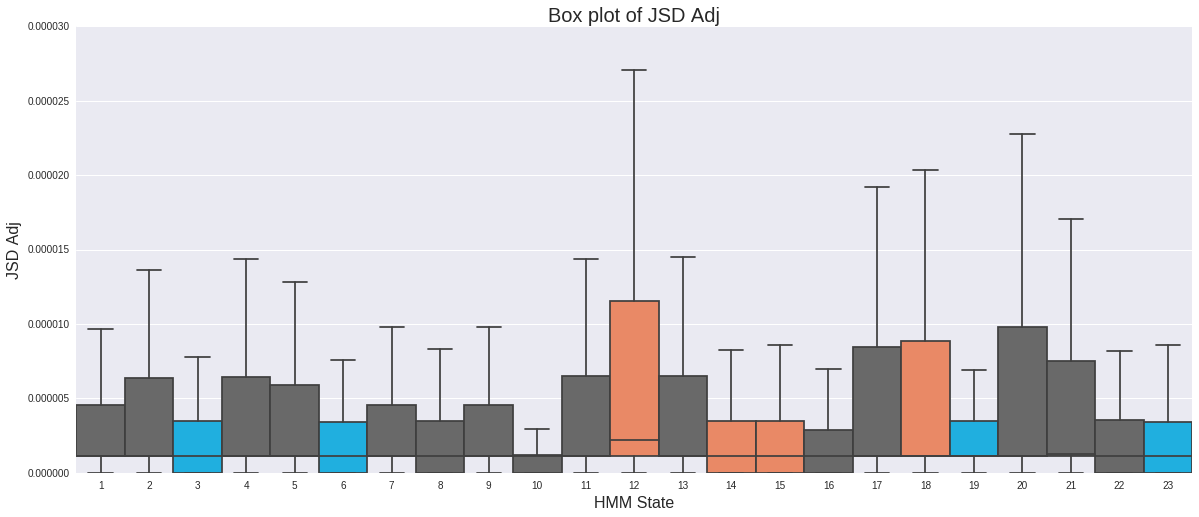

In [31]:
jsd_adj_sns_table_0s_per = create_sns_table_from_flat_dict(states_JSD_adj_dict_0s_per, "JSD Adj")
plot_box_plot(jsd_adj_sns_table_0s_per, states_JSD_adj_dict_0s_per.keys(), "JSD Adj", "Box plot of JSD Adj", "box_plot_JSD_Adj_trim_0s_per", False)

# Debugging code

### Plot States Average

In [113]:
avg_af_dict = {}
avg_af_adj_dict = {}
std_af_adj_dict = {}
for state in states_dict.keys():
    af_sum = 0
    af_adj_sum = 0
    af_adj_list = []
    
    for d in states_dict[state]:
        af_sum += d["af"]
        af_adj_sum += d["af_adj"]
        af_adj_list.append(d["af_adj"])
        
    af_avg = af_sum/float(len(states_dict[state]))
    af_adj_avg = af_adj_sum/float(len(states_dict[state]))
    std_af_adj_dict[state] = np.std(af_adj_list)
    avg_af_dict[state] = af_avg
    avg_af_adj_dict[state] = af_adj_avg

In [ ]:
#plt.figure(figsize=(15,8))
plt.bar(avg_af_dict.keys(), avg_af_dict.values())
plt.xticks(np.arange(1,states_num + 1), avg_af_dict.keys(), ha='left')
plt.xlabel("HMM-States")
plt.ylabel("AF average")
plt.title("Average AF of ExAC aligned to Zinc finger HMM states")
#plt.savefig(curr_dir[0]+"/EMD_plots/SNP_Homeobox_Avg.pdf")
plt.show()

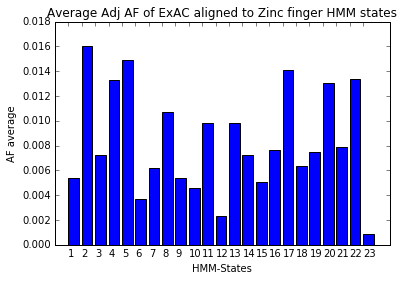

In [116]:
plt.bar(std_af_adj_dict.keys(), std_af_adj_dict.values())
plt.xticks(np.arange(1,states_num + 1), std_af_adj_dict.keys(), ha='left')
plt.xlabel("HMM-States")
plt.ylabel("AF average")
plt.title("Average Adj AF of ExAC aligned to Zinc finger HMM states")
plt.show()

In [16]:
sns.set_style("whitegrid", {'axes.grid' : False})

### EMD bins implementation

In [69]:
af_emd_bins_dict = compute_bins_emd(states_af_dict, 1000)
af_adj_emd_bins_dict = compute_bins_emd(states_af_adj_dict, 1000)

### Explore States distribution

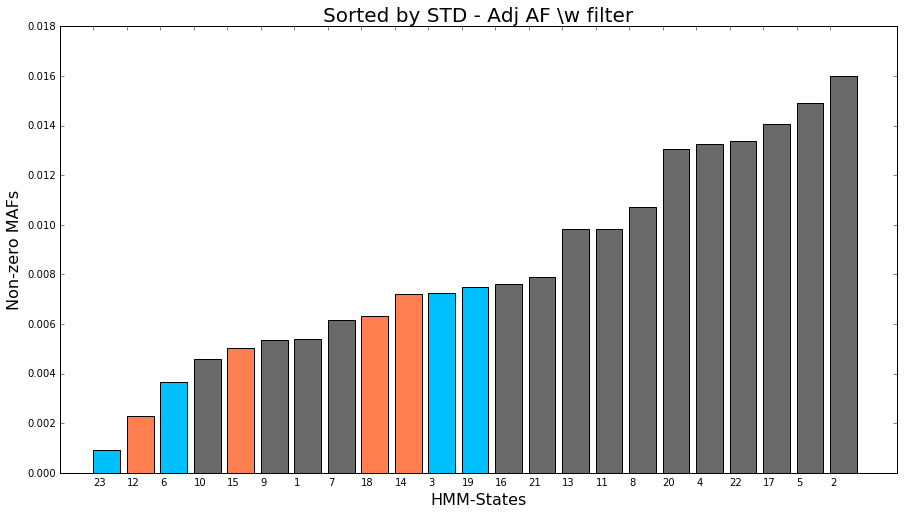

In [120]:
plot_sorted(std_af_adj_dict.values(), "Adj AF \w filter", "Sorted_STD_Adj_filter")

plt.bar(states_dict.keys(), non_zero_adj_af)
plt.xticks(np.arange(1,states_num + 1), avg_af_adj_dict.keys(), ha='left')
plt.xlabel("HMM-States")
plt.ylabel("Non-zero AF")
plt.title("Number of non-zero AF - missense mutations")
plt.show()

### Plot Scatter of AF and coverage

In [37]:
#Scatter only for state 19 - JSD:
state_19_adj_JSD = []
state_19_mean_cov_JSD = []
for i in range(len(states_dict[19])):
    state_19_adj_JSD.append(states_dict[19][i]["JSD_adj"])
    state_19_mean_cov_JSD.append(states_dict[19][i]["coverage_mean"])

In [43]:
max(state_19_adj_JSD)

0.29193096579132993

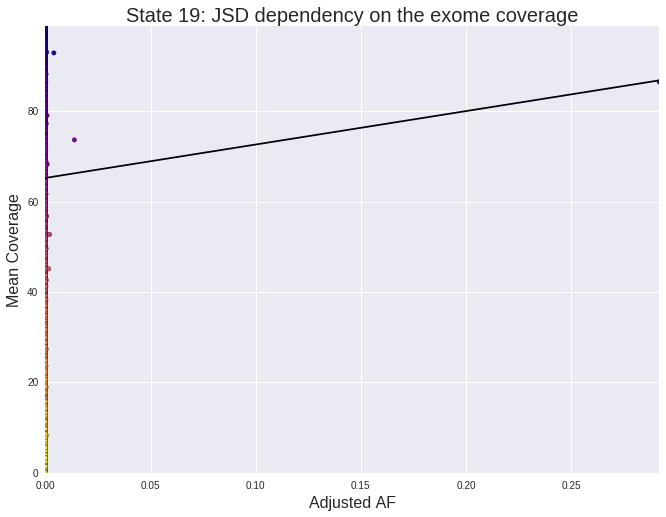

In [39]:
plot_scatter(state_19_adj_JSD, state_19_mean_cov_JSD, "State 19: JSD dependency on the exome coverage", "state19_JSD_Adj_Cov_scatter")

In [35]:
for i in range(len(states_dict[19])):
    if (states_dict[19][i]["JSD_adj"] > 0.25):
        print states_dict[19][i]

{'JSD': 0.29085470312584394, 'chrom_pos': (44377669, 44377668, 44377667), 'af': 0.474, 'af_adj': 0.4754, 'aa_ref': 'H', 'prot_pos': 233, 'ens_gene': 'ENSG00000176222', 'coverage_mean': 86.53, 'chrom': '19', 'JSD_adj': 0.29193096579132993, 'bp_ref': 'CAT'}


In [27]:
#Scatter only for state 3 - JSD:
state_3_adj_JSD = []
state_3_mean_cov_JSD = []
for i in range(len(states_dict[3])):
    state_3_adj_JSD.append(states_dict[3][i]["JSD_adj"])
    state_3_mean_cov_JSD.append(states_dict[3][i]["coverage_mean"])

In [28]:
max(state_3_adj_JSD)

0.06625369700855968

In [30]:
for i in range(len(states_dict[3])):
    if (states_dict[3][i]["af"] > 0.4):
        print states_dict[3][i]

{'JSD': 1.6425264105135093e-05, 'chrom_pos': (44052903, 44052902, 44052901), 'af': 0.44200000000000006, 'af_adj': 0.44099999999999995, 'aa_ref': 'G', 'prot_pos': 209, 'coverage_mean': 79.25, 'chrom': '10', 'JSD_adj': 1.6309978911622406e-05, 'bp_ref': 'TGT'}
